In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy as ay
import astropy.coordinates as ay_coord

import magnetic_field_functions_2d as mff2d
import magnetic_field_functions_3d as mff3d
import model_observing as m_obs

In [2]:
def mag_field(x,y,z):
    h = 0.3257
    k_array = [0.9549,0.4608,0.6320]
    disk_radius = 3.8918
    uniform_B0 = 3.3118    
    return mff3d.hourglass_magnetic_field_cart_3d(x, y, z,
                                                  h, k_array, disk_radius, uniform_B0,
                                                  center=[0, 0, 0])

def cloud_eq(x,y,z):
    radius = 2
    return x**2 + y**2 + z**2 - radius

def test_field(x,y,z):
    return 0,10,0

center_coord = ay_coord.SkyCoord('00h00m00.00s','00d00m00.00s',frame='icrs')

In [3]:
target_object = m_obs.ProtostarModel(center_coord,cloud_eq,test_field)

target_sightline = m_obs.Sightline(None,None,Skycord_object=center_coord)

In [8]:
telescope_data = m_obs.ObservingRun(target_object,target_sightline,3)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


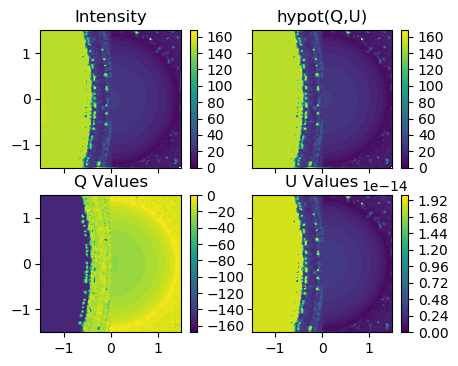

In [9]:
telescope_data.Stokes_parameter_contours(n_samples=10000)